<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


### Full Name : Amirhossein Mahmoudi, Mohammadtaghi DehghanNezhad



### Student Number : 98108779,98104122

---


# Introduction


In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.


In [ ]:
!pip install umap-learn
!pip install tqdm

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
from scipy import stats


# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import plotly.express as px 
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model
import keras
from keras import layers
from xgboost import XGBClassifier,XGBRegressor

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from umap import UMAP
from tqdm import tqdm_notebook as tqdm


# Data Documentation


For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data.
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "\_mut" at the end of the names of the columns)
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).


# Data Preparation (15 Points)


In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)


## Data Loading & Splitting


In [95]:
#import from google drive

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/proj_ml/METABRIC_RNA_Mutation.csv', dtype={
                  'siah1_mut': 'str', 'smarcb1_mut': 'str', 'hras_mut': 'str', 'rasgef1b_mut': 'str'})

#import from current folder
# df = pd.read_csv('METABRIC_RNA_Mutation.csv', dtype={
#                   'siah1_mut': 'str', 'smarcb1_mut': 'str', 'hras_mut': 'str', 'rasgef1b_mut': 'str'})


df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df.shape

(1904, 693)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


### seperate clinical data

In [98]:
clinical_data = df.loc[:, "patient_id":"death_from_cancer"]
clinical_data.head()


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


### seperate all genes data

In [99]:
#drop clinical data and keep patient id
gene_data = df.drop(df.iloc[:, 1:31], axis=1)
#add overall survival column (target)
gene_data['overall_survival']=df['overall_survival']
gene_data.head()


,patient_id,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,overall_survival
0,0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,0,0,0,0,0,0,0,0,0,1
1,2,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,0,0,0,0,0,0,0,0,0,1
2,5,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,0,0,0,0,0,0,0,0,0,0
3,6,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,0,0,0,0,0,0,0,0,0,1
4,8,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,0,0,0,0,0,0,0,0,0,0


### seperate normal genes data

In [100]:
#select columns which dont have _mut at their ends
desired_columns = pd.Series(gene_data.columns).str.endswith(
    "_mut").apply(lambda x: not x)
#select desired columns
gene_exp_data = gene_data.loc[:, gene_data.columns[desired_columns]]
gene_exp_data.head()


,patient_id,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
0,0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,1
1,2,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1
2,5,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,0
3,6,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,1
4,8,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,0


### seperate mutated genes data

In [101]:
# select mutataed columns
desired_columns = pd.Series(gene_data.columns).str.endswith("_mut")
# make id columns value True
desired_columns[0] = True
#make overall survival value True
desired_columns[663]=True
#select desired columns
gene_mut_data = gene_data.loc[:, gene_data.columns[desired_columns]]
gene_mut_data.head()


,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,overall_survival
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,H178P,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,H1047R,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,E542K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,0,S241F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## EDA


For each dataset, you must perform a sufficient EDA.(not mutated dataset)


### clinical data EDA


Text(0.5, 1.0, 'Missing value')

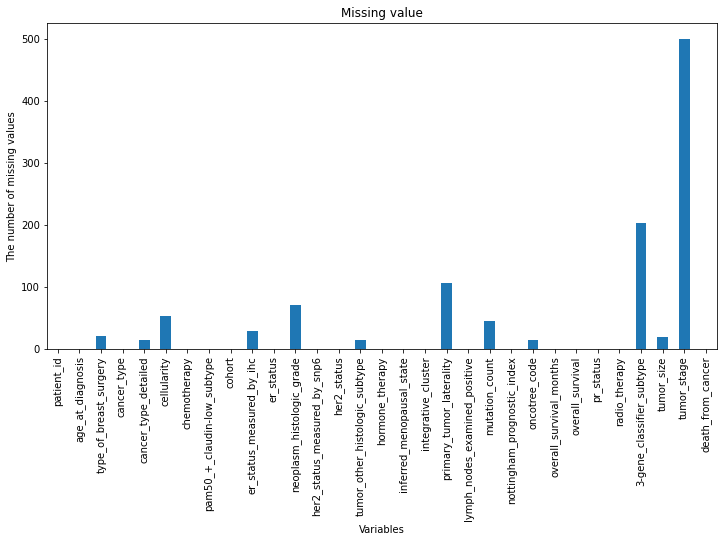

In [6]:
# Plot of missing value number
clinical_data.isnull().sum().plot.bar(figsize=(12, 6))
plt.ylabel('The number of missing values')
plt.xlabel('Variables')
plt.title('Missing value')

In [13]:
# Unique values count
for i in clinical_data.columns:
  count = clinical_data[i].unique().size
  print("Unique values count in {} is  : ".format(i)+ str(count))

Unique values count in patient_id is  : 1904
Unique values count in age_at_diagnosis is  : 1572
Unique values count in type_of_breast_surgery is  : 3
Unique values count in cancer_type is  : 2
Unique values count in cancer_type_detailed is  : 7
Unique values count in cellularity is  : 4
Unique values count in chemotherapy is  : 2
Unique values count in pam50_+_claudin-low_subtype is  : 7
Unique values count in cohort is  : 5
Unique values count in er_status_measured_by_ihc is  : 3
Unique values count in er_status is  : 2
Unique values count in neoplasm_histologic_grade is  : 4
Unique values count in her2_status_measured_by_snp6 is  : 4
Unique values count in her2_status is  : 2
Unique values count in tumor_other_histologic_subtype is  : 9
Unique values count in hormone_therapy is  : 2
Unique values count in inferred_menopausal_state is  : 2
Unique values count in integrative_cluster is  : 11
Unique values count in primary_tumor_laterality is  : 3
Unique values count in lymph_nodes_exam

In [16]:
# Return a numerical dataframe for use in the next one function
def numerical_df(df):
    # drop non numerical columns
    num_df = df[df.select_dtypes(include=np.number).columns.tolist()]

    return num_df

# function that takes a dataframe and transforms it into a standard form after dropping non numirical columns
def numerical_standardizer(num_df):
    # making standard scalar:removing mean and scale to variance 1
    standard_scalar = StandardScaler()
    # apply
    std = standard_scalar.fit_transform(num_df)
    # making new  dataframe
    standard_df = pd.DataFrame(std, index=num_df.index, columns=num_df.columns)
    return standard_df

# drop non numerical columns
numerical_clinical_data = numerical_df(clinical_data)
std_clinical_data = numerical_standardizer(numerical_clinical_data)
std_clinical_data.head()


,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
0,-1.663366,1.122359,-0.512445,-1.338368,0.897956,0.788547,1.960788,NaN,1.757557,0.201518,1.173469,0.821330,-0.279656,0.396748
1,-1.662518,-1.379317,-0.512445,-1.338368,0.897956,0.788547,-0.490841,-0.911280,-0.011378,-0.530544,1.173469,0.821330,-1.071371,-1.193646
2,-1.661245,-0.941562,1.951430,-1.338368,-0.639479,0.788547,-0.245678,-0.911280,-0.002638,0.505525,-0.852174,-1.217538,-0.741490,0.396748
3,-1.660821,-1.033275,1.951430,-1.338368,-0.639479,0.788547,0.244648,-1.157725,0.014841,0.521686,1.173469,0.821330,-0.081727,0.396748
4,-1.659973,1.224091,1.951430,-1.338368,0.897956,0.788547,1.470462,-0.911280,1.789021,-1.097499,-0.852174,0.821330,0.907918,0.396748


Text(0, 0.5, 'Variables')

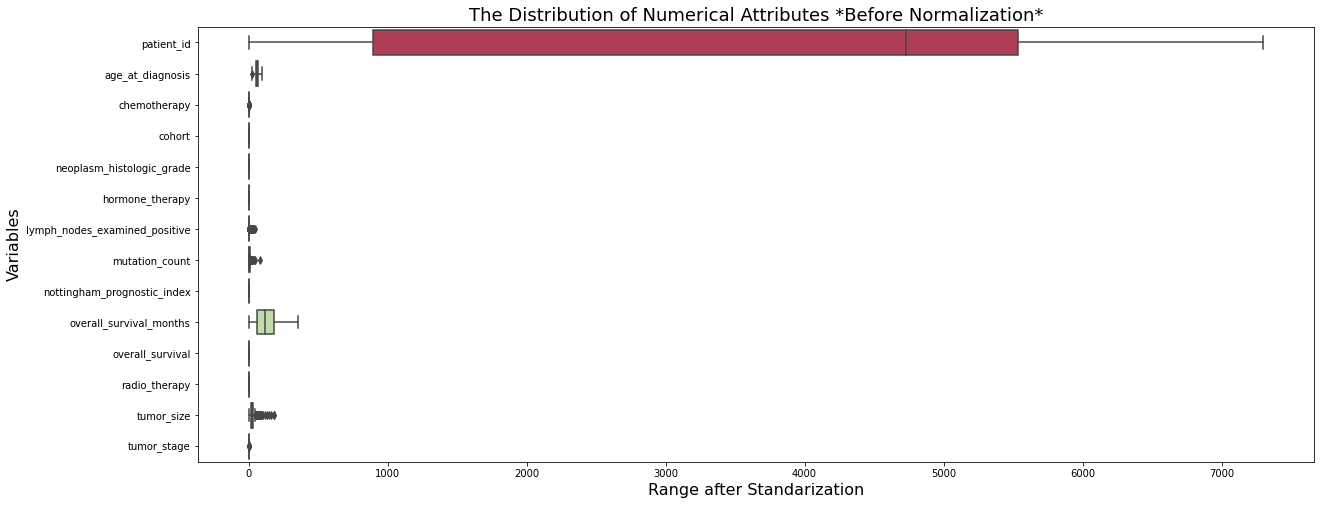

In [24]:
# Plot the boxplots of numerical variables
ax, fig = plt.subplots(1, 1, figsize=(20, 8))
plt.title('The Distribution of Numerical Attributes *Before Normalization*', fontsize=18)

sns.boxplot(y="variable", x="value", data=pd.melt(
    numerical_clinical_data), palette='Spectral')
plt.xlabel('Range after Standarization', size=16)
plt.ylabel('Variables', size=16)


Text(0, 0.5, 'Variables')

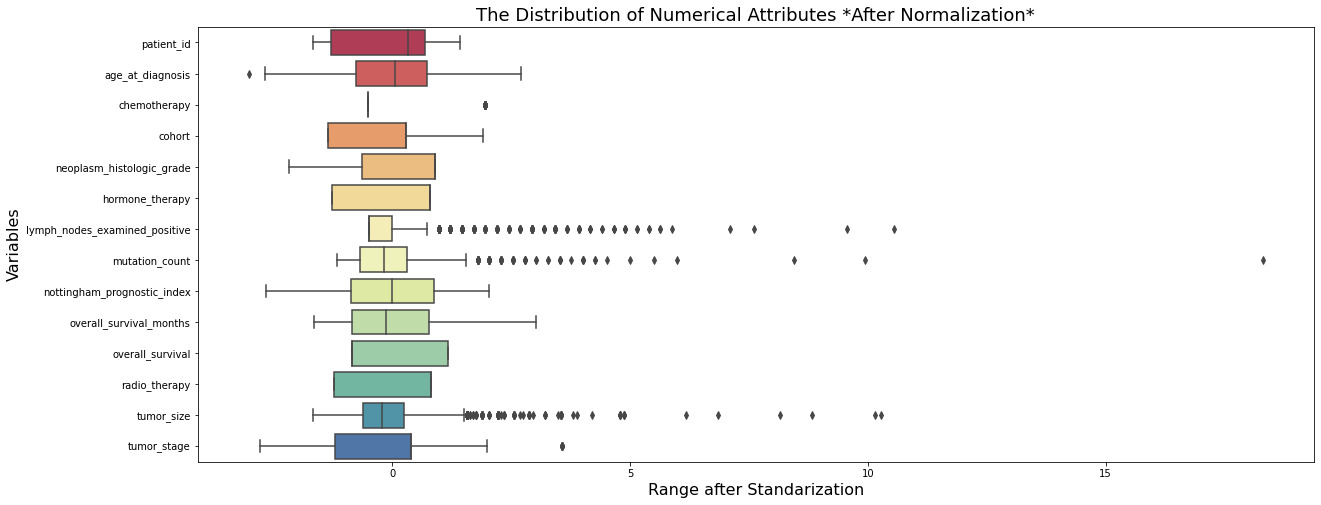

In [23]:
# Plot the boxplots of numerical variables
ax, fig = plt.subplots(1, 1, figsize=(20, 8))
plt.title('The Distribution of Numerical Attributes *After Normalization*', fontsize=18)

sns.boxplot(y="variable", x="value", data=pd.melt(
    std_clinical_data), palette='Spectral')
plt.xlabel('Range after Standarization', size=16)
plt.ylabel('Variables', size=16)


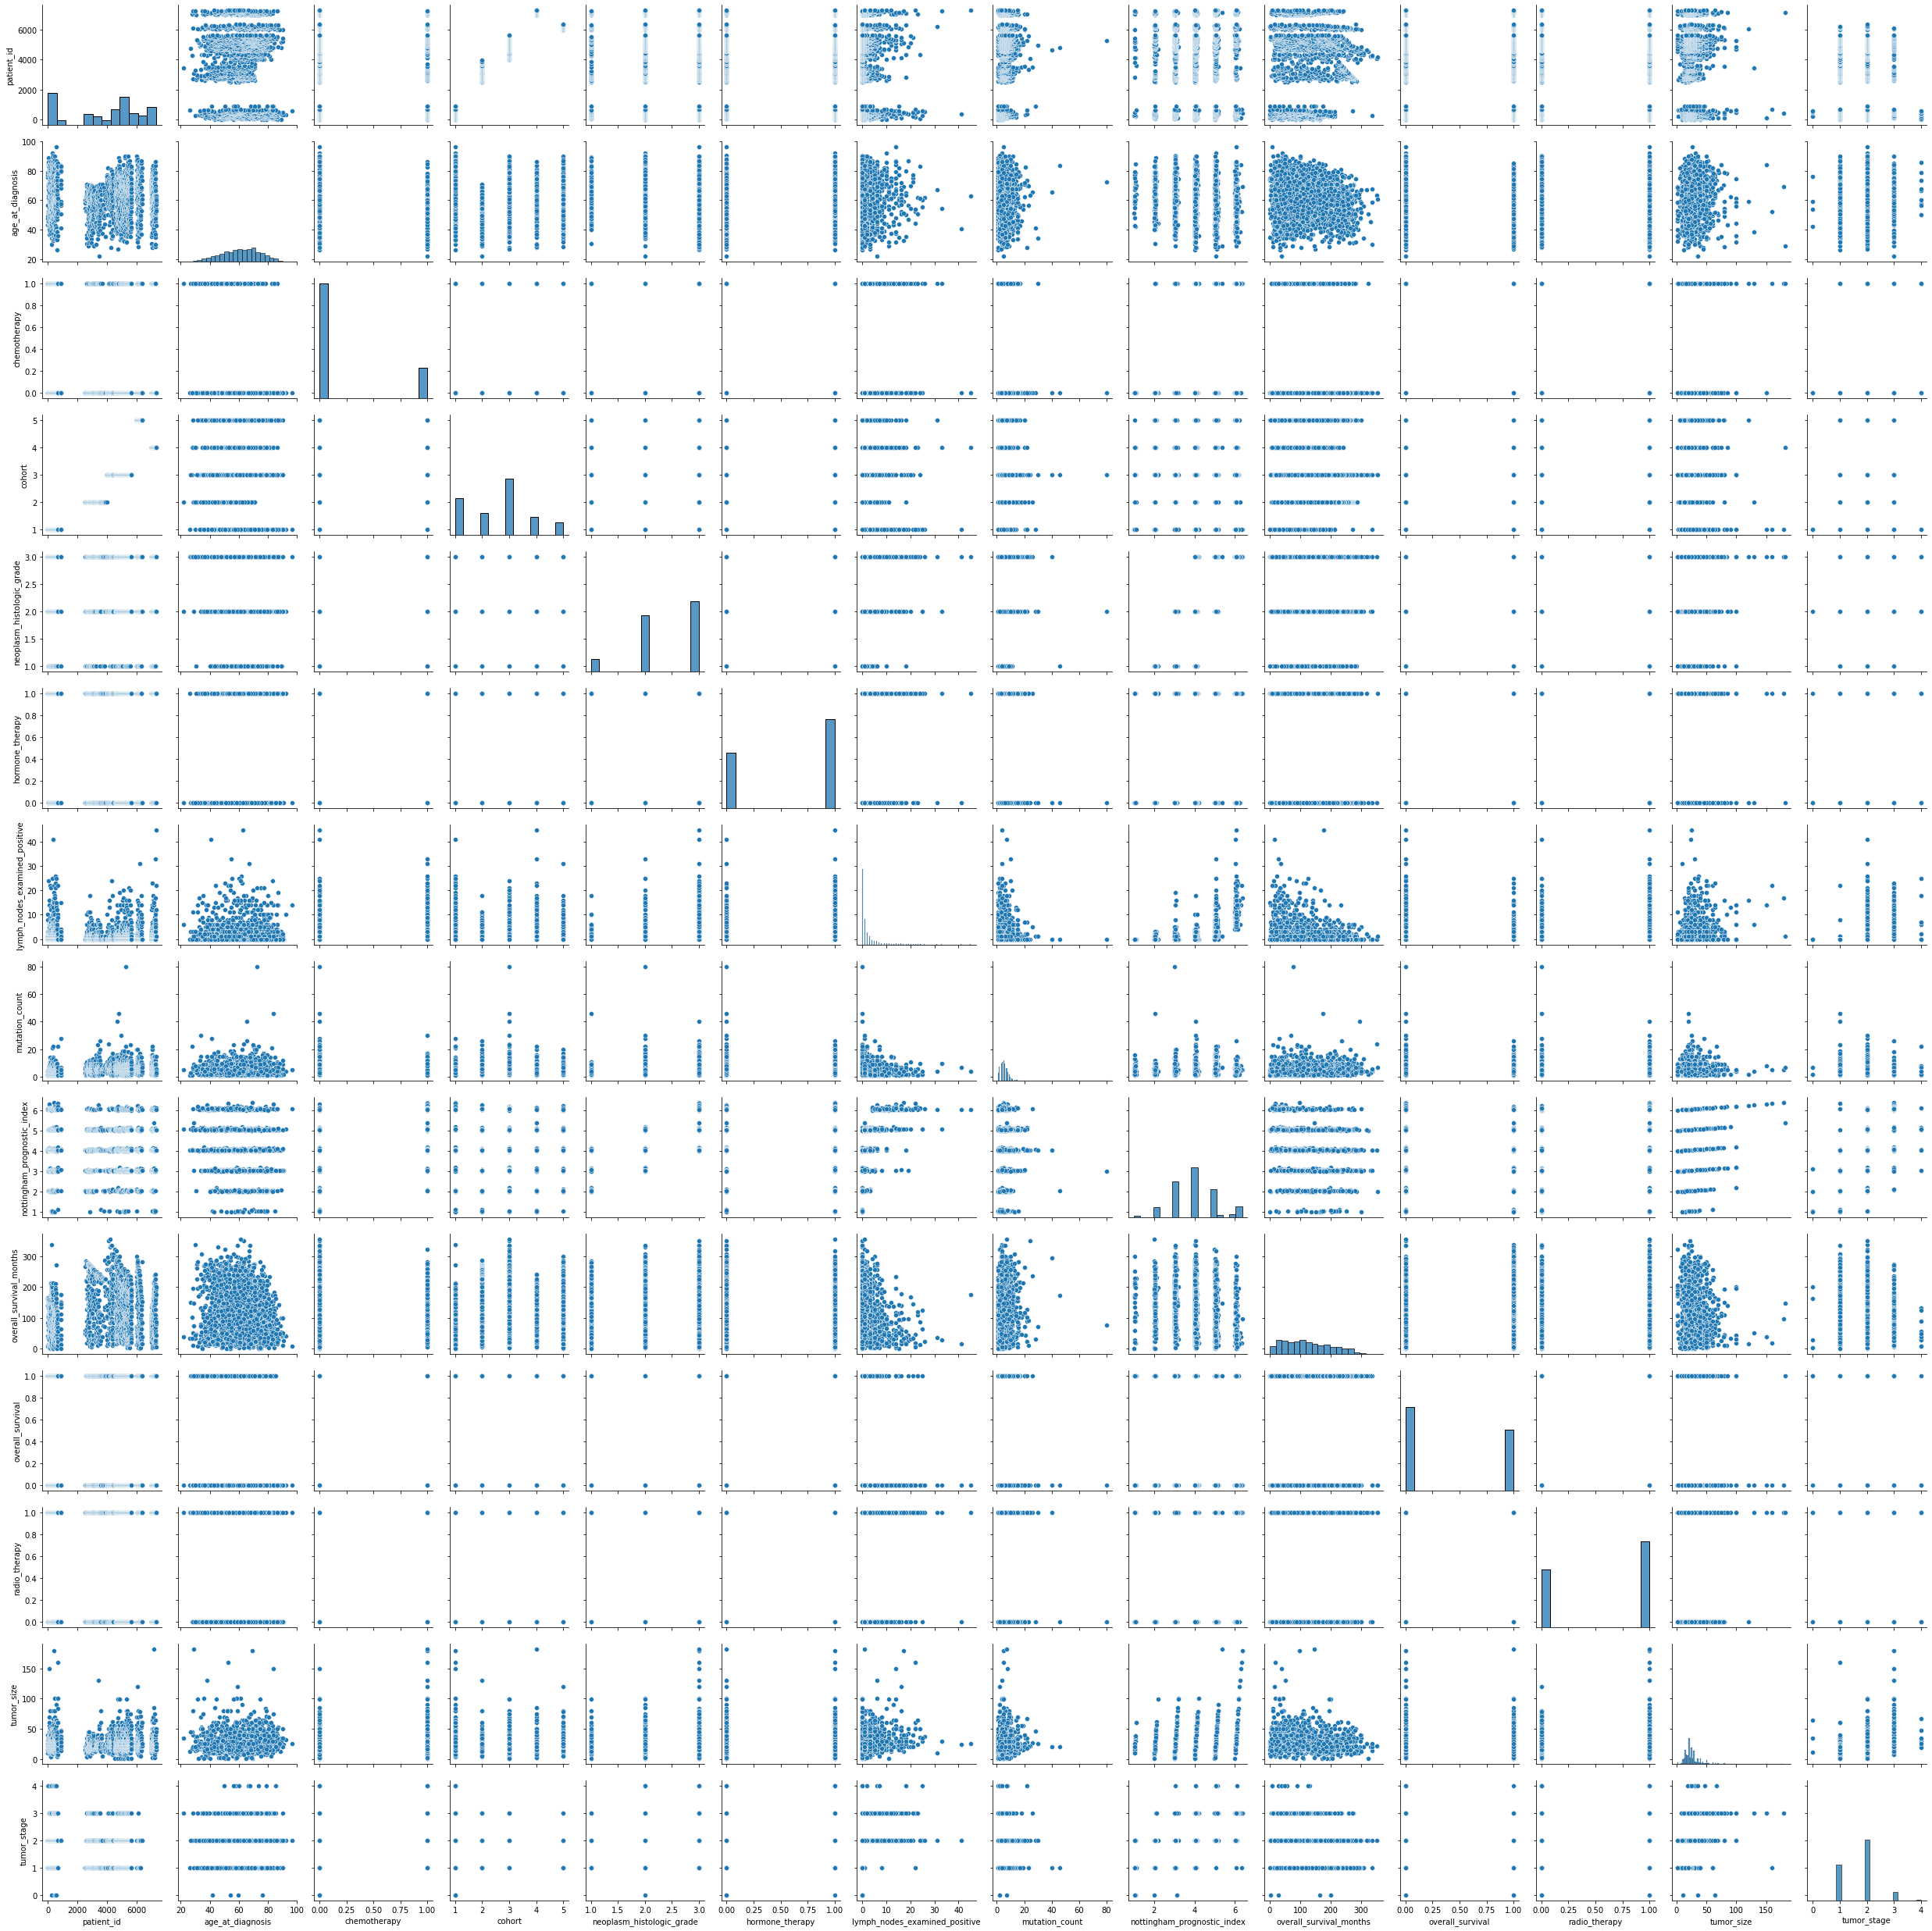

In [ ]:
# correlations
g = sns.pairplot(clinical_data)
plt.show()

In [168]:
# Baseline Accuracy

print('Baseline accuracy:' )
base_line_accuracy=df["overall_survival"].value_counts()/df["overall_survival"].count()
print(base_line_accuracy)

Baseline accuracy:
0    0.579307
1    0.420693
Name: overall_survival, dtype: float64


In [ ]:
# Statistics for the no treatment group and comparison with the baseline

no_treatment = clinical_data[(clinical_data['chemotherapy']==0) & (clinical_data['hormone_therapy']==0) & (clinical_data['radio_therapy']==0)]
print("Number of patients who had no treatment: " , no_treatment.shape[0])
print("Proportion of survival with no treatment: " , ("%.3f" %np.mean(no_treatment["overall_survival"])))
print("Baseline proportion of survival in all groups: ", ("%.3f" %np.mean(df["overall_survival"])))

Number of patients who had no treatment:  289
Proportion of survival with no treatment:  0.381
Baseline proportion of survival in all groups:  0.421


In [ ]:
# What the average patient looks like

print("Mean of age : " + "%.3f" %np.mean(clinical_data['age_at_diagnosis']))
print("Most occurring tumour stage :", stats.mode(clinical_data['tumor_stage'])[0][0].astype(int))
print("Most occurring histopathological type :", stats.mode(clinical_data['neoplasm_histologic_grade'])[0][0].astype(int))
print("Mean of tumour diameter : " + "%.3f" %np.mean(clinical_data['tumor_size']))
print("Probability of survival : "+ "%.3f" %(clinical_data["overall_survival"].value_counts()/clinical_data["overall_survival"].count()).iloc[1])

Mean of age : 61.087
Most occurring tumour stage : 2
Most occurring histopathological type : 3
Mean of tumour diameter : 26.239
Probability of survival : 0.421


In [ ]:
# Outliers in each column

Q1 = clinical_data.quantile(0.25)
Q3 = clinical_data.quantile(0.75)
IQR = Q3 - Q1
((clinical_data < (Q1 - 1.5 * IQR)) | (clinical_data > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False)

<ipython-input-18-a174ef1df5b5>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((clinical_data < (Q1 - 1.5 * IQR)) | (clinical_data > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False)


chemotherapy                      396
lymph_nodes_examined_positive     210
tumor_size                        142
mutation_count                     62
tumor_stage                         9
age_at_diagnosis                    1
tumor_other_histologic_subtype      0
radio_therapy                       0
primary_tumor_laterality            0
neoplasm_histologic_grade           0
patient_id                          0
pam50_+_claudin-low_subtype         0
overall_survival_months             0
overall_survival                    0
oncotree_code                       0
nottingham_prognostic_index         0
pr_status                           0
3-gene_classifier_subtype           0
integrative_cluster                 0
inferred_menopausal_state           0
hormone_therapy                     0
her2_status_measured_by_snp6        0
her2_status                         0
er_status_measured_by_ihc           0
er_status                           0
death_from_cancer                   0
cohort      

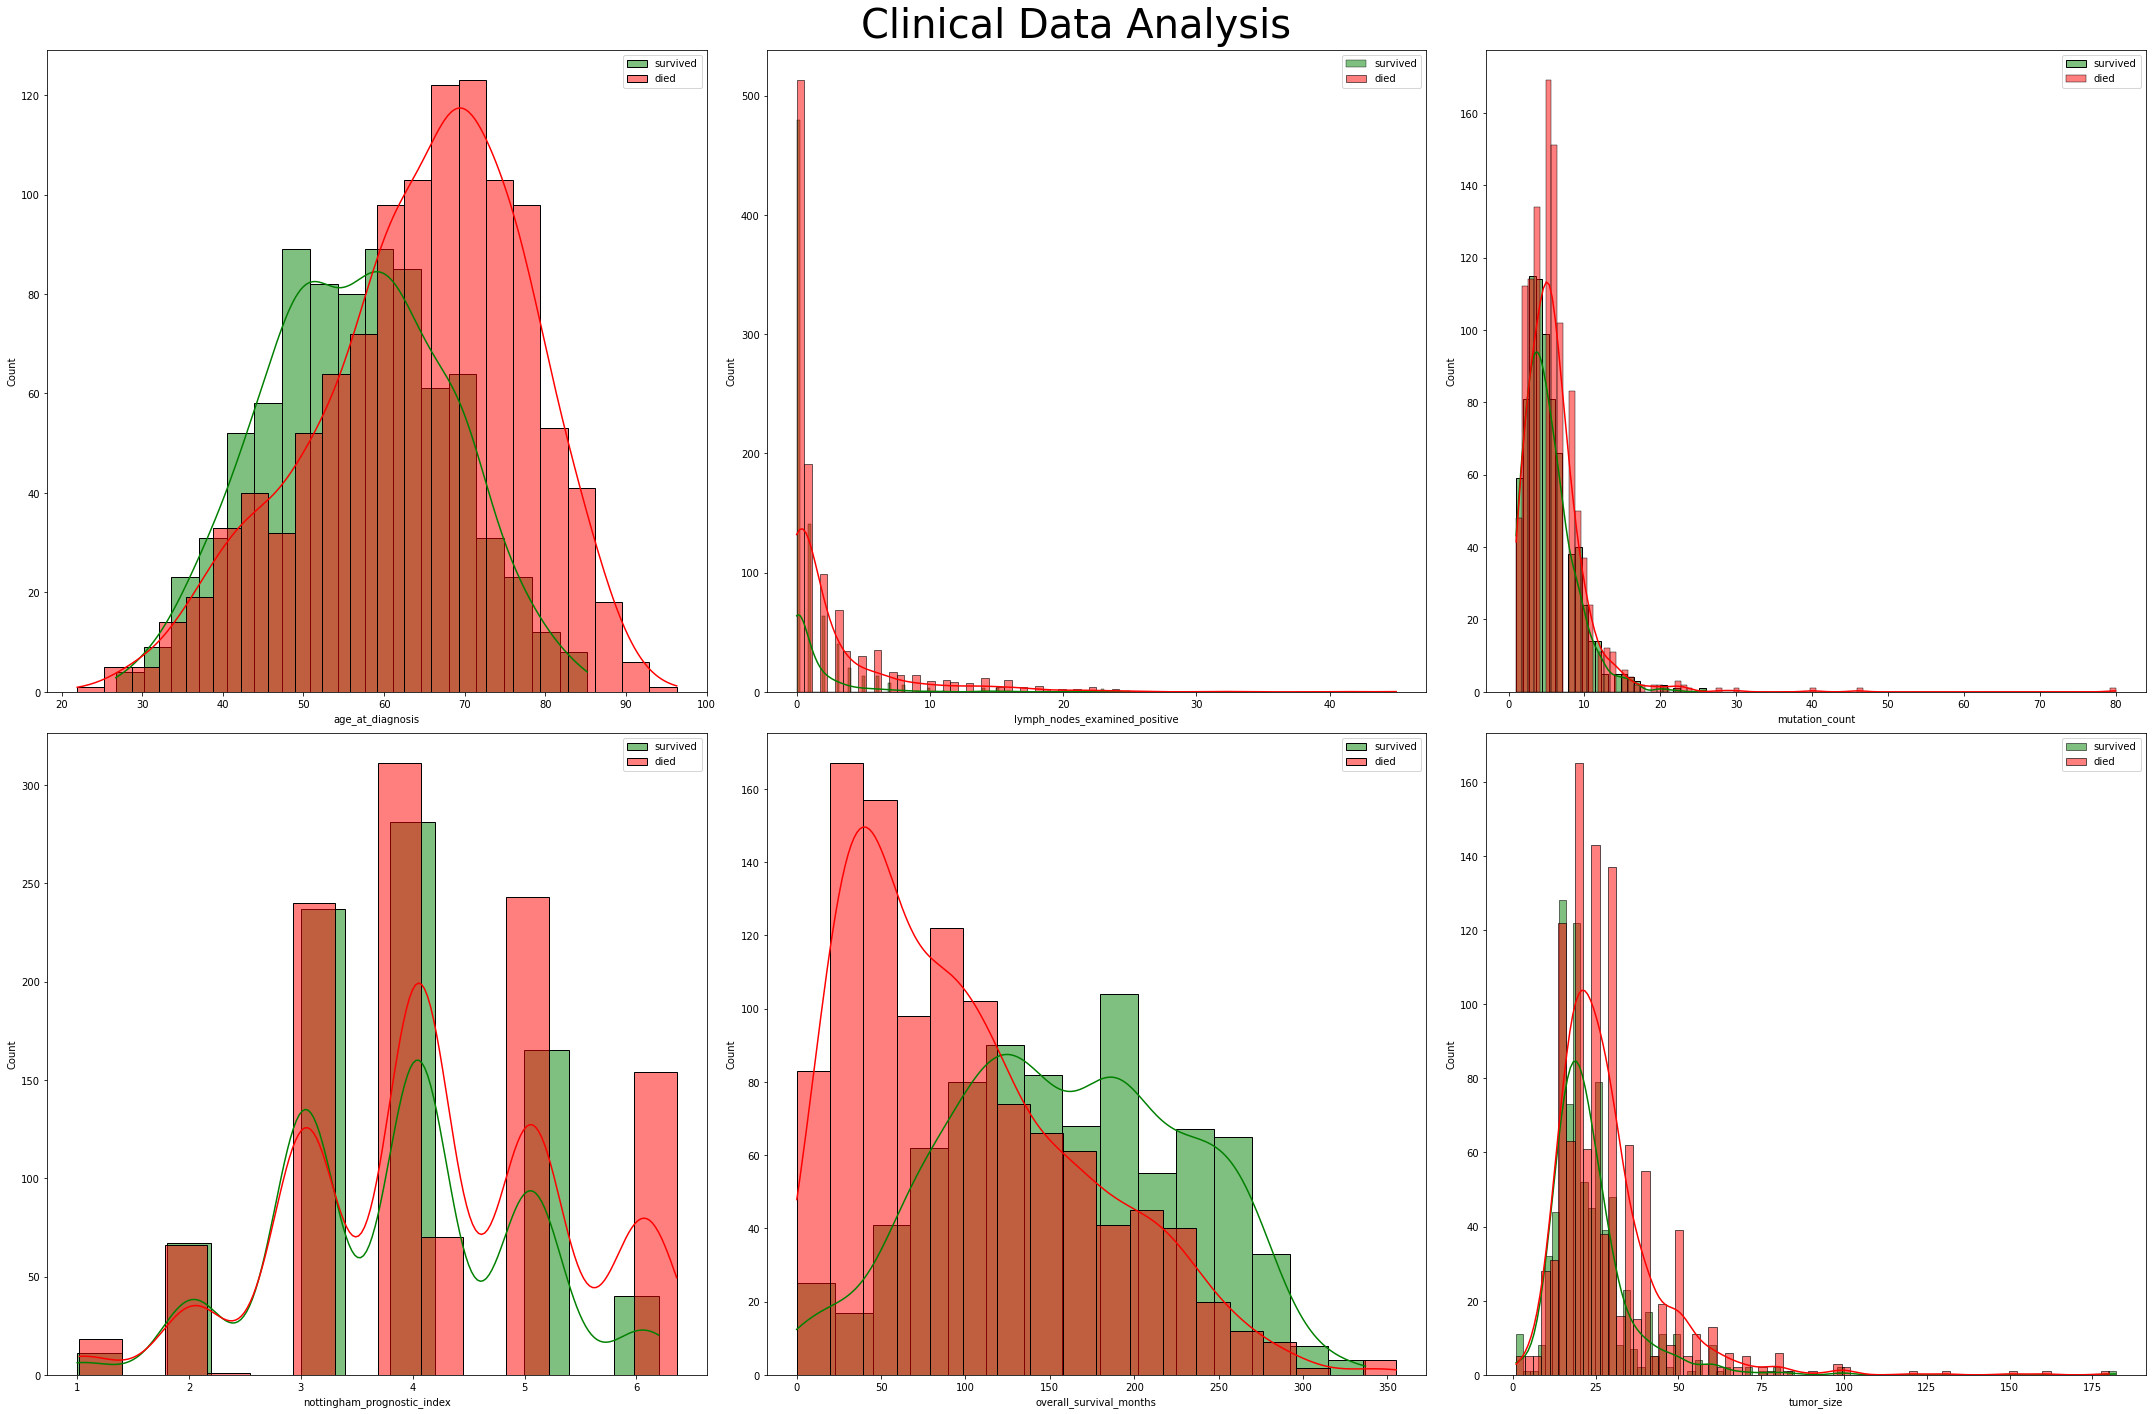

In [53]:
# Target classes plots

fig = plt.figure(figsize=(30, 20))
column_counter = 0
important_numerical_clinical_data = numerical_df(clinical_data).drop(
    columns=['patient_id', 'chemotherapy', 'overall_survival', 'hormone_therapy', 'radio_therapy', 'neoplasm_histologic_grade', 'cohort', 'tumor_stage'])
for i in important_numerical_clinical_data:
    plt.subplot(2, 3, column_counter+1)
    column_counter += 1
    sns.histplot(clinical_data[i][clinical_data['overall_survival']
                 == 1], color='g', label='survived', kde=True)
    sns.histplot(clinical_data[i][clinical_data['overall_survival']
                 == 0], color='r', label='died', kde=True)
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis', fontsize=40)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


Age at diagonosis:
The patients who survived have bimodal distribution
The patients who died have left skewed distribution

Lymph nodes examined positive :
both the patients who survived and died have right skewed distribution

Mutation count :
both the patients who survived and died have right skewed distribution

Nottingham prognostic index :
both the patients who survived and died have multimodal distribution

Overall survival months:
The patients who survived have bimodal distribution
The patients who died have right skewed distribution

Tumor size :
both the patients who survived and died have right skewed distribution


In [77]:
died = clinical_data[clinical_data['overall_survival']==0]
survived = clinical_data[clinical_data['overall_survival']==1]

alive_from_cancer = clinical_data[clinical_data['death_from_cancer']=='Living']
died_from_cancer = clinical_data[clinical_data['death_from_cancer']=='Died of Disease']
died_not_cancer = clinical_data[clinical_data['death_from_cancer']=='Died of Other Causes']

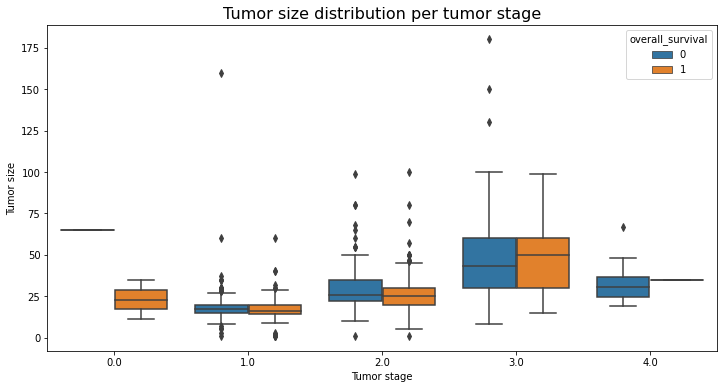

In [80]:
ig, ax = plt.subplots( figsize=(12, 6))
ax = sns.boxplot(x ='tumor_stage', y ='tumor_size',  data = clinical_data, orient='v', hue='overall_survival')

ax.set_ylabel('Tumor size')
ax.set_xlabel('Tumor stage')
plt.title('Tumor size distribution per tumor stage', fontsize=16)
plt.show()

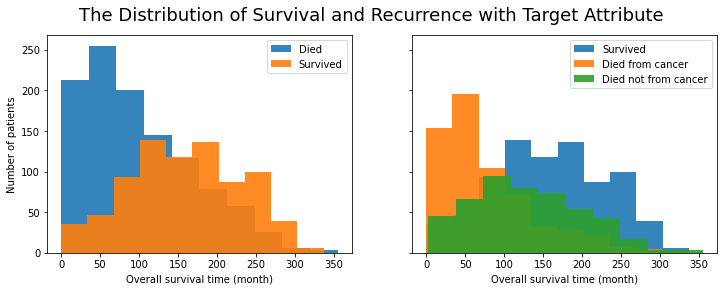

In [82]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), sharey=True)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].hist(died['overall_survival_months'], alpha=0.9, label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9, label='Survived')
ax[0].legend()

ax[1].hist(alive_from_cancer['overall_survival_months'], alpha=0.9, label='Survived')
ax[1].hist(died_from_cancer['overall_survival_months'], alpha=0.9, label='Died from cancer')
ax[1].hist(died_not_cancer['overall_survival_months'], alpha=0.9, label='Died not from cancer')
ax[1].legend()

ax[0].set_xlabel('Overall survival time (month)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Overall survival time (month)')
ax[1].set_ylabel('')

plt.show()

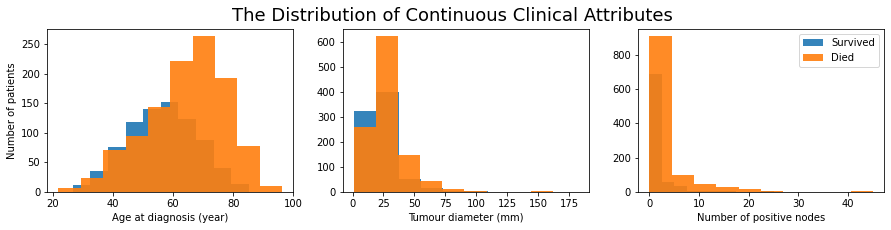

In [85]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(survived['age_at_diagnosis'], alpha=0.9, label='Survived')
ax[0].hist(died['age_at_diagnosis'], alpha=0.9, label='Died')
#ax[0].legend()

ax[1].hist(survived['tumor_size'], alpha=0.9, label='Survived')
ax[1].hist(died['tumor_size'], alpha=0.9, label='Died')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.9, label='Survived')
ax[2].hist(died['lymph_nodes_examined_positive'], alpha=0.9, label='Died')
ax[2].legend()

ax[0].set_xlabel('Age at diagnosis (year)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


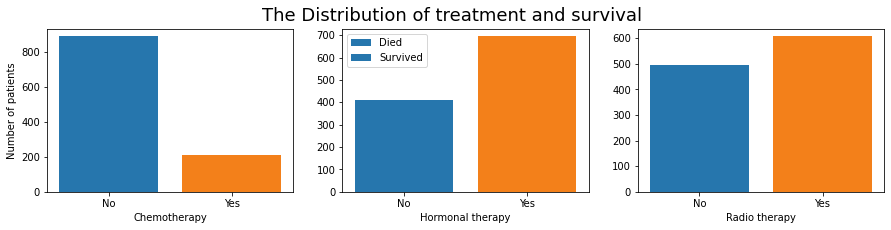

In [93]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of treatment and survival', fontsize = 18)

sns.countplot(died['chemotherapy'], label='Died', ax=ax[0], saturation=0.90)
sns.countplot(x=survived['chemotherapy'] , label='Survived', ax=ax[0], saturation=0.90)

#ax[0].legend()
ax[0].set(xticklabels=['No','Yes'])

sns.countplot(died['hormone_therapy'], label='Died', ax=ax[1], saturation=0.90)
sns.countplot(x=survived['hormone_therapy'], label='Survived', ax=ax[1], saturation=0.90)

ax[1].legend()
ax[1].set(xticklabels=['No','Yes'])

sns.countplot(died['radio_therapy'], label='Died', ax=ax[2], saturation=0.90)
sns.countplot(x=survived['radio_therapy'], label='Survived', ax=ax[2], saturation=0.90)

# ax[2].legend()
ax[2].set(xticklabels=['No','Yes'])

ax[0].set_xlabel('Chemotherapy')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Hormonal therapy')
ax[1].set_ylabel('')
ax[2].set_xlabel('Radio therapy')
ax[2].set_ylabel('')

plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


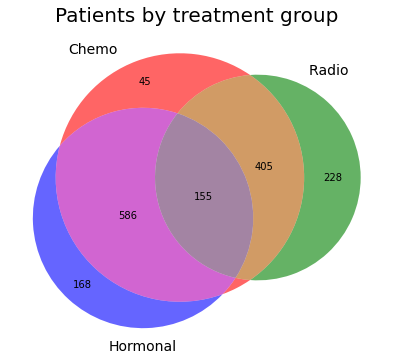

In [91]:
#create subsets for different combinations of treatments
from matplotlib_venn import venn3


chemo = clinical_data[(clinical_data["chemotherapy"]==True) & (clinical_data["radio_therapy"]==False) & (clinical_data["hormone_therapy"]==False)]
radio = clinical_data[(clinical_data["chemotherapy"]==False) & (clinical_data["radio_therapy"]==True) & (clinical_data["hormone_therapy"]==False)]
hormonal = clinical_data[(clinical_data["chemotherapy"]==False) & (clinical_data["radio_therapy"]==False) & (clinical_data["hormone_therapy"]==True)]
chemo_radio = clinical_data[(clinical_data["chemotherapy"]==True) & (clinical_data["radio_therapy"]==True) & (clinical_data["hormone_therapy"]==False)]
radio_hormonal = clinical_data[(clinical_data["chemotherapy"]==False) & (clinical_data["radio_therapy"]==True) & (clinical_data["hormone_therapy"]==True)]
hormonal_chemo = clinical_data[(clinical_data["chemotherapy"]==True) & (clinical_data["radio_therapy"]==False) & (clinical_data["hormone_therapy"]==True)]
all_3 = clinical_data[(clinical_data["chemotherapy"]==True) & (clinical_data["radio_therapy"]==True) & (clinical_data["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(8,6))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6)

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Patients by treatment group", size=20)
plt.show()

### gene data EDA

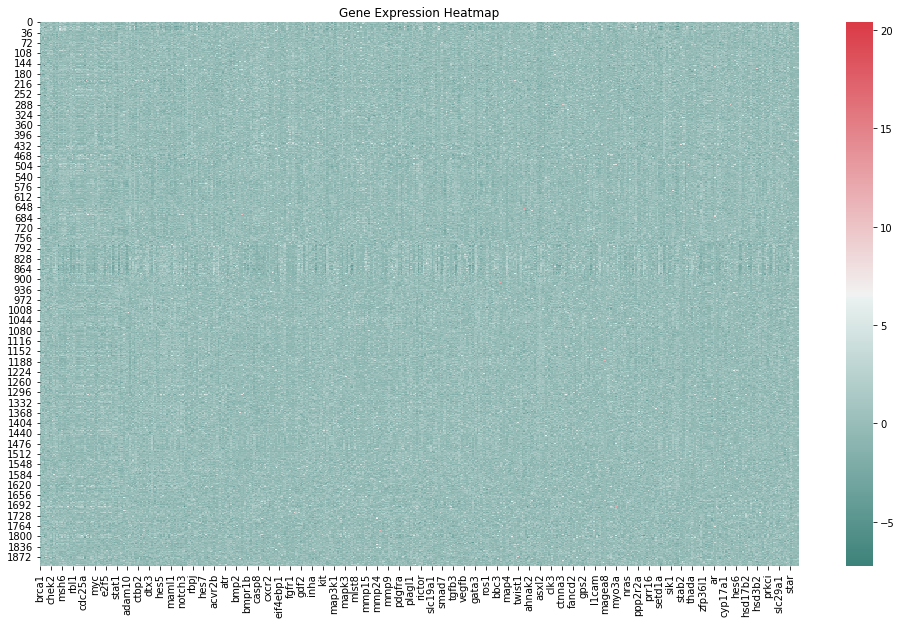

In [104]:
# Visualizing the mRNA values in a heatmap.
fig, axs = plt.subplots(figsize = (17, 10)) 
sns.heatmap(gene_exp_data.drop(['patient_id','overall_survival'], axis=1), ax = axs, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Gene Expression Heatmap')

plt.show()

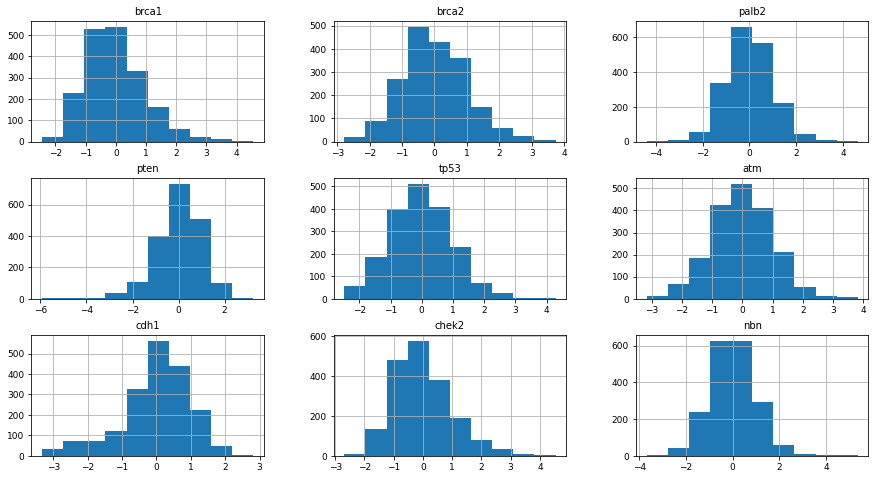

In [107]:
params = {'axes.titlesize':'10',
          'xtick.labelsize':'9',
          'ytick.labelsize':'9'}
matplotlib.rcParams.update(params)
#plt.subplots_adjust(hspace=0.5) 
gene_exp_data.drop(['patient_id','overall_survival'], axis=1).iloc[:,:9].hist(figsize=(15,8))
plt.show()

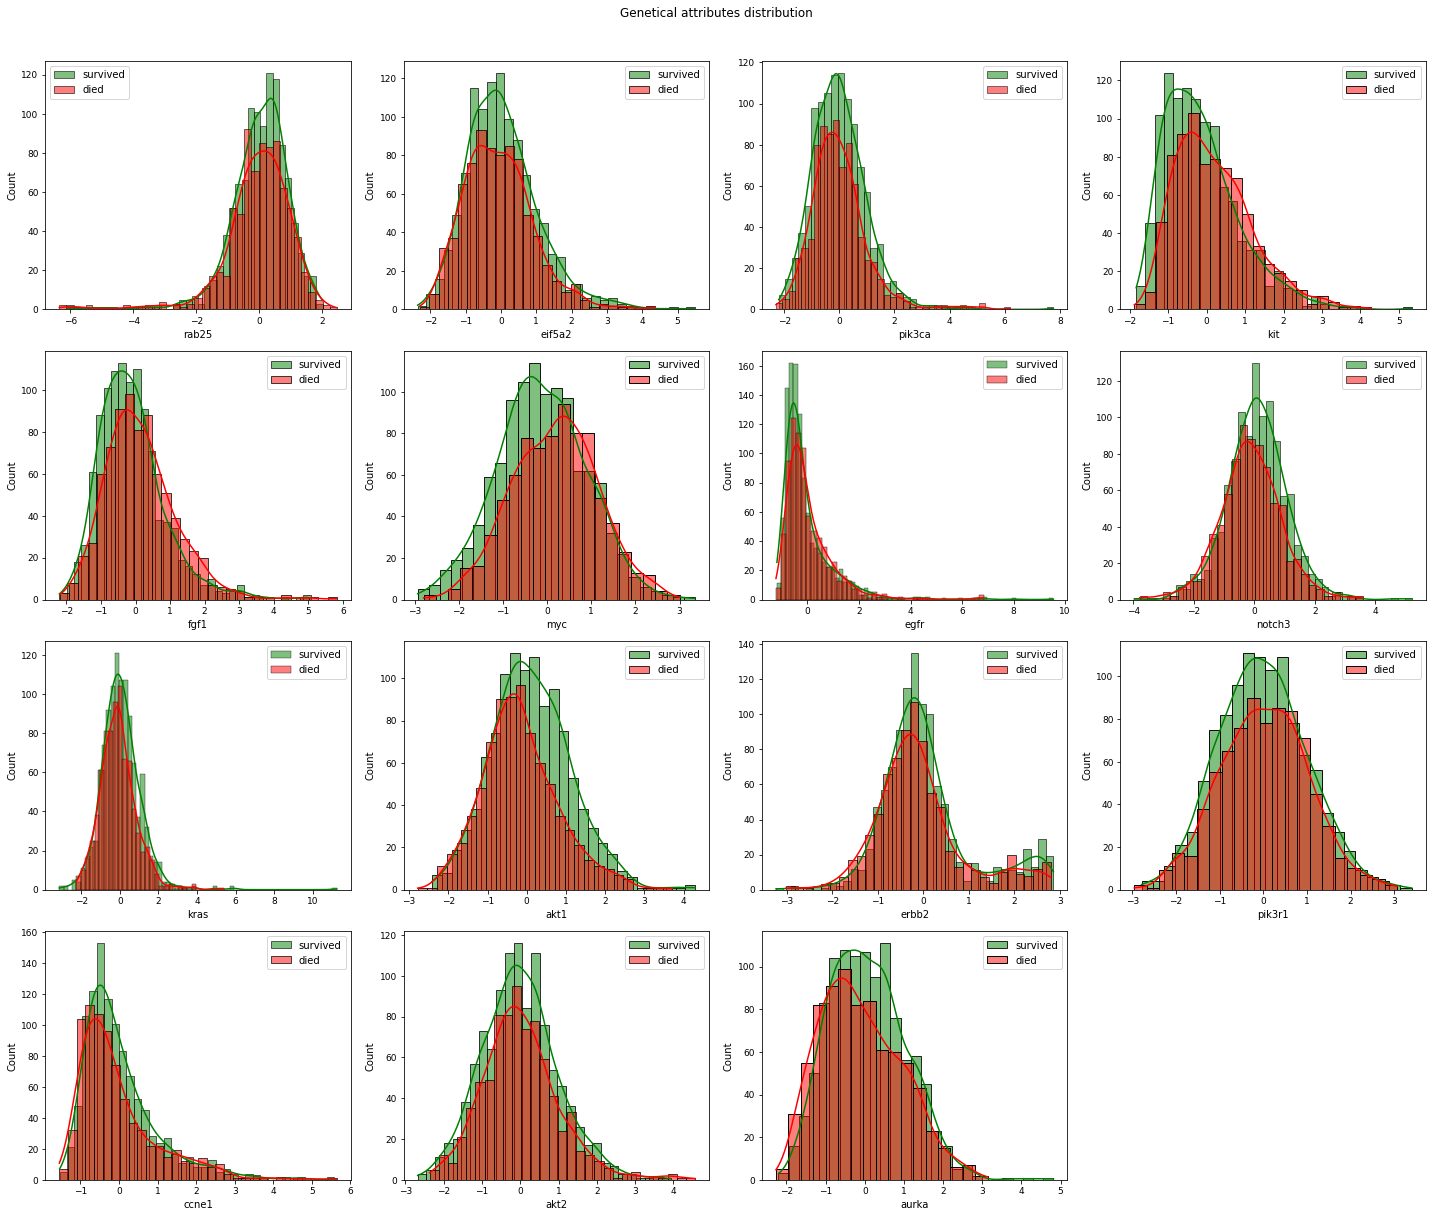

In [130]:
fig = plt.figure(figsize = (20, 25))
j = 0

gene_list = ['rab25', 'eif5a2', 'pik3ca', 'kit', 'fgf1', 'myc', 'egfr', 'notch3', 'kras', 'akt1', 'erbb2', 'pik3r1', 'ccne1', 'akt2', 'aurka']
for i in gene_exp_data.drop(['patient_id'], axis=1).loc[:,gene_list].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.histplot(gene_exp_data[i][gene_exp_data['overall_survival']==0], color='g', label = 'survived',kde = True)
    sns.histplot(gene_exp_data[i][gene_exp_data['overall_survival']==1], color='r', label = 'died',kde = True)
    plt.legend(loc='best')
fig.suptitle('Genetical attributes distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Making features and Target dataframes

### Making x and y for clincal data

In [109]:
categorical_columns = clinical_data.select_dtypes(include=['object']).columns.tolist()

categorical_columns.remove('death_from_cancer' )

#make dummy datafram for catagorical columns
dummies_df = pd.get_dummies(clinical_data.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
#drop NaNs
dummies_df.dropna(inplace = True)
#remove data leakage and target variables and make features 
clinical_X = dummies_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
#make target
clinical_y = dummies_df['overall_survival']
clinical_X.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,radio_therapy,...,oncotree_code_MDLC,oncotree_code_nan,pr_status_Negative,pr_status_Positive,pr_status_nan,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,3-gene_classifier_subtype_nan
1,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,1,...,0,0,0,1,0,1,0,0,0,0
2,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,0,...,0,0,0,1,0,0,0,0,0,1
3,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,1,...,1,0,0,1,0,0,0,0,0,1
4,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,1,...,1,0,0,1,0,1,0,0,0,0
5,78.77,0,1.0,3.0,1,0.0,4.0,4.062,7.800000,1,...,0,0,0,1,0,1,0,0,0,0


### Making x and y for genes data

In [110]:
#drop NaNs
gene_exp_data.dropna(inplace=True)

#drop id and taget to create features df
gen_X = gene_exp_data.drop(['patient_id', 'overall_survival'], axis=1)
#create tqarget df
gen_y = gene_exp_data['overall_survival']
gen_X.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


## Split train  & test Data

startify is used to make same distributions

### Clinical data

In [111]:
clinical_X_train, clinical_X_test, clinical_y_train, clinical_y_test = train_test_split(clinical_X, clinical_y, test_size=0.2, random_state=42, stratify = clinical_y)

### genes data

In [112]:
gen_X_train, gen_X_test, gen_y_train, gen_y_test = train_test_split(gen_X, gen_y, test_size=0.2, random_state=42, stratify = gen_y)

# Dimension Reduction (20 + Up to 10 Points Optional)


For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.


## a function to plot 3d data

In [115]:
def chart(X, y):
    
    #  sort the data by label 
    
    # Concatenate X and y arrays
    arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
    # Create a Pandas dataframe using the above array
    df=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'label'])
    # Convert label data type from float to integer
    df['label'] = df['label'].astype(int)
    # Finally, sort the dataframe by label
    df.sort_values(by='label', axis=0, ascending=True, inplace=True)
    
    # Create a 3D graph
    fig = px.scatter_3d(df, x='x', y='y', z='z', color=df['label'].astype(str), height=900, width=950)

    # Update chart looks
    fig.update_layout(title_text='UMAP',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
    
    fig.show()

## Reduction for clinical data

### make UMAP reducer

In [116]:
# Configure UMAP hyperparameters
#3d
reducer_clinical_3d = UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=3, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.5, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=2, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )
#2d
reducer_clinical_2d = UMAP(n_neighbors=60, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=2, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.5, # default 0.1, The effective minimum distance between embedded points.
               spread=1.5, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=2, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

### Apply reduction

In [117]:
clinical_X_train_reduced_2d=reducer_clinical_2d.fit_transform(clinical_X_train,clinical_y_train)
clinical_X_test_reduced_2d=reducer_clinical_2d.transform(clinical_X_test)
clinical_X_reduced_2d=reducer_clinical_2d.transform(clinical_X)

clinical_X_train_reduced_3d=reducer_clinical_3d.fit_transform(clinical_X_train,clinical_y_train)
clinical_X_test_reduced_3d=reducer_clinical_3d.transform(clinical_X_test)
clinical_X_reduced_3d=reducer_clinical_3d.transform(clinical_X)

### Plot 2d reduction

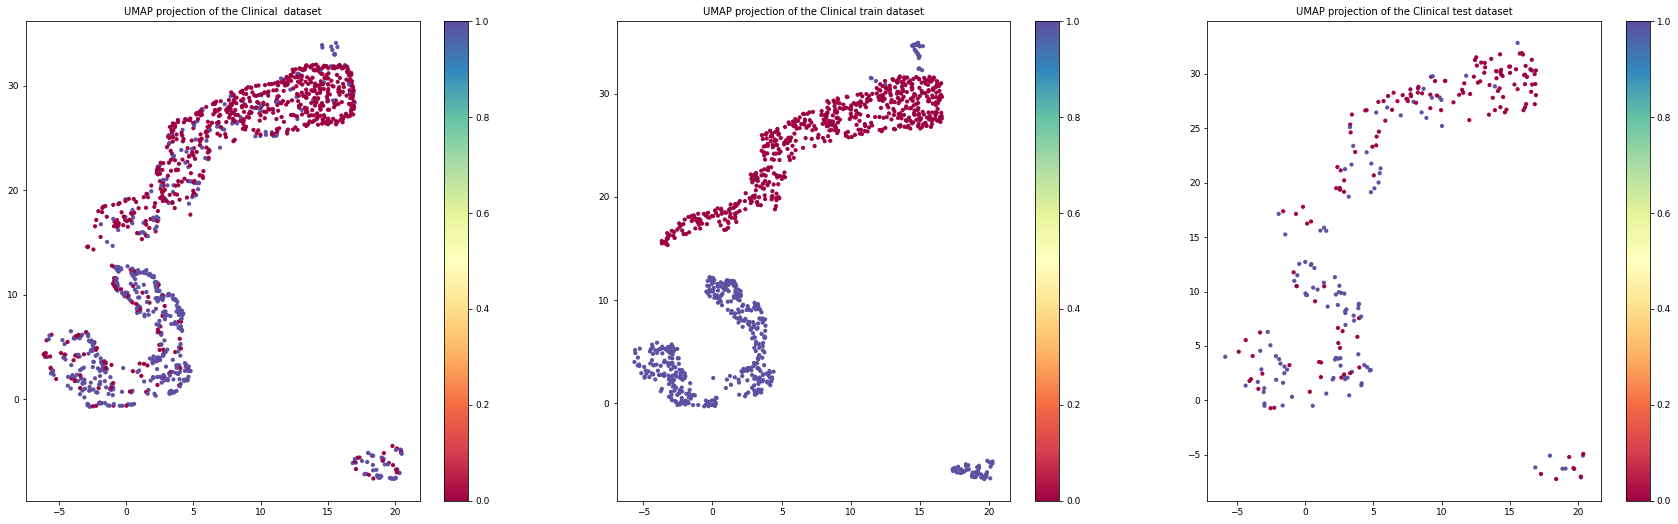

In [118]:
plt.rcParams["figure.figsize"]=(30,30)
plt.subplot(3,3,1)
plt.scatter(clinical_X_reduced_2d[:,0],clinical_X_reduced_2d[:,1], c=clinical_y, cmap='Spectral', s=10)
plt.colorbar()
plt.grid(True)
plt.title('UMAP projection of the Clinical  dataset', fontsize=10);
plt.grid()

plt.subplot(3,3,2)
plt.scatter(clinical_X_train_reduced_2d[:,0],clinical_X_train_reduced_2d[:,1], c=clinical_y_train, cmap='Spectral', s=10)
plt.colorbar()
plt.grid(True)
plt.title('UMAP projection of the Clinical train dataset', fontsize=10);
plt.grid()

plt.subplot(3,3,3)
plt.scatter(clinical_X_test_reduced_2d[:,0],clinical_X_test_reduced_2d[:,1], c=clinical_y_test, cmap='Spectral', s=10)
plt.colorbar()
plt.grid(True)
plt.title('UMAP projection of the Clinical test dataset', fontsize=10);
plt.grid()

### Plot 3d Reduction

In [119]:
chart(clinical_X_train_reduced_3d, clinical_y_train.values)
chart(clinical_X_test_reduced_3d, clinical_y_test.values)

## Reduction for genes data

### make UMAP reducer

In [142]:
# Configure UMAP hyperparameters
reducer_gen_3d = UMAP(n_neighbors=70, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=3, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=2, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=3, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

reducer_gen_2d = UMAP(n_neighbors=60, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=2, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.5, # default 0.1, The effective minimum distance between embedded points.
               spread=1.5, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=2, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

### Apply reduction

In [143]:
# gen_X_train_reduced_2d=reducer_clinical_2d.fit_transform(clinical_X_train,clinical_y_train)
# clinical_X_test_reduced_2d=reducer_clinical_2d.transform(clinical_X_test)
# clinical_X_reduced_2d=reducer_clinical_2d.transform(clinical_X)

gen_X_train_reduced_3d=reducer_gen_3d.fit_transform(gen_X_train,gen_y_train)
gen_X_test_reduced_3d=reducer_gen_3d.transform(gen_X_test)
gen_X_reduced_3d=reducer_gen_3d.transform(gen_X)

### Plot 3d reduction

In [144]:
chart(gen_X_train_reduced_3d,gen_y_train.values)
chart(gen_X_test_reduced_3d,gen_y_test.values)

### AutoEncoder Reduction

In [145]:
# This is the size of our encoded representations
encoding_dim = 20  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(gen_X_train.shape[1],))
# "encoded" is the encoded representation of the input
encoded1 = layers.Dense((gen_X_train.shape[1],)[0]//2, activation='relu')(input_img)
encoded2 = layers.Dense(encoding_dim, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded1 = layers.Dense((gen_X_train.shape[1],)[0]//2, activation='sigmoid')(encoded2)#X_train.shape[1]
decoded2 = layers.Dense((gen_X_train.shape[1],)[0], activation='sigmoid')(decoded1)#X_train.shape[1]

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded2)


encoder = keras.Model(input_img, encoded2)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded2, decoded2)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [146]:

result = []
for ts in tqdm(range(4, 50, 5)):
  history = autoencoder.fit(gen_X_train, gen_X_train,
                  epochs=20,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(gen_X_test, gen_X_test))

  result.append(history.history['loss'][-1])

NameError: ignored

In [ ]:
# Encode and decode some example
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(gen_X_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
autoencoder.summary()
plot_model(autoencoder, show_shapes=True)

### The most important feature

In [170]:
from sklearn.decomposition import PCA
 
pca = PCA().fit(gen_X_train)


print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[7.91378055e-02 6.74416369e-02 5.59956998e-02 3.77793147e-02
 2.40269533e-02 2.17253411e-02 2.00036531e-02 1.69257820e-02
 1.59183257e-02 1.37163377e-02 1.23379626e-02 1.09607240e-02
 1.08752218e-02 9.09180533e-03 8.20049771e-03 7.54984482e-03
 6.96684014e-03 6.74333448e-03 6.65848149e-03 6.36275728e-03
 6.16538681e-03 5.80782928e-03 5.76258228e-03 5.70820215e-03
 5.34807459e-03 5.27469170e-03 5.21533017e-03 5.05464508e-03
 4.96892829e-03 4.93728179e-03 4.65996350e-03 4.58179210e-03
 4.40993508e-03 4.28446566e-03 4.24305808e-03 4.15427273e-03
 4.09794707e-03 4.05643303e-03 4.03192784e-03 3.93553966e-03
 3.86439971e-03 3.80370966e-03 3.71806943e-03 3.65821991e-03
 3.51351002e-03 3.47449881e-03 3.44324389e-03 3.38911276e-03
 3.36355107e-03 3.30078736e-03 3.24049981e-03 3.18961509e-03
 3.16239705e-03 3.12464353e-03 3.09427616e-03 3.03383996e-03
 2.99681792e-03 2.99169878e-03 2.95702062e-03 2.91947384e-03
 2.90875854e-03 2.85511829e-03 2.83977075e-03 2.81473647e-03
 2.80118482e-03 2.763829

(0.0, 15.0)

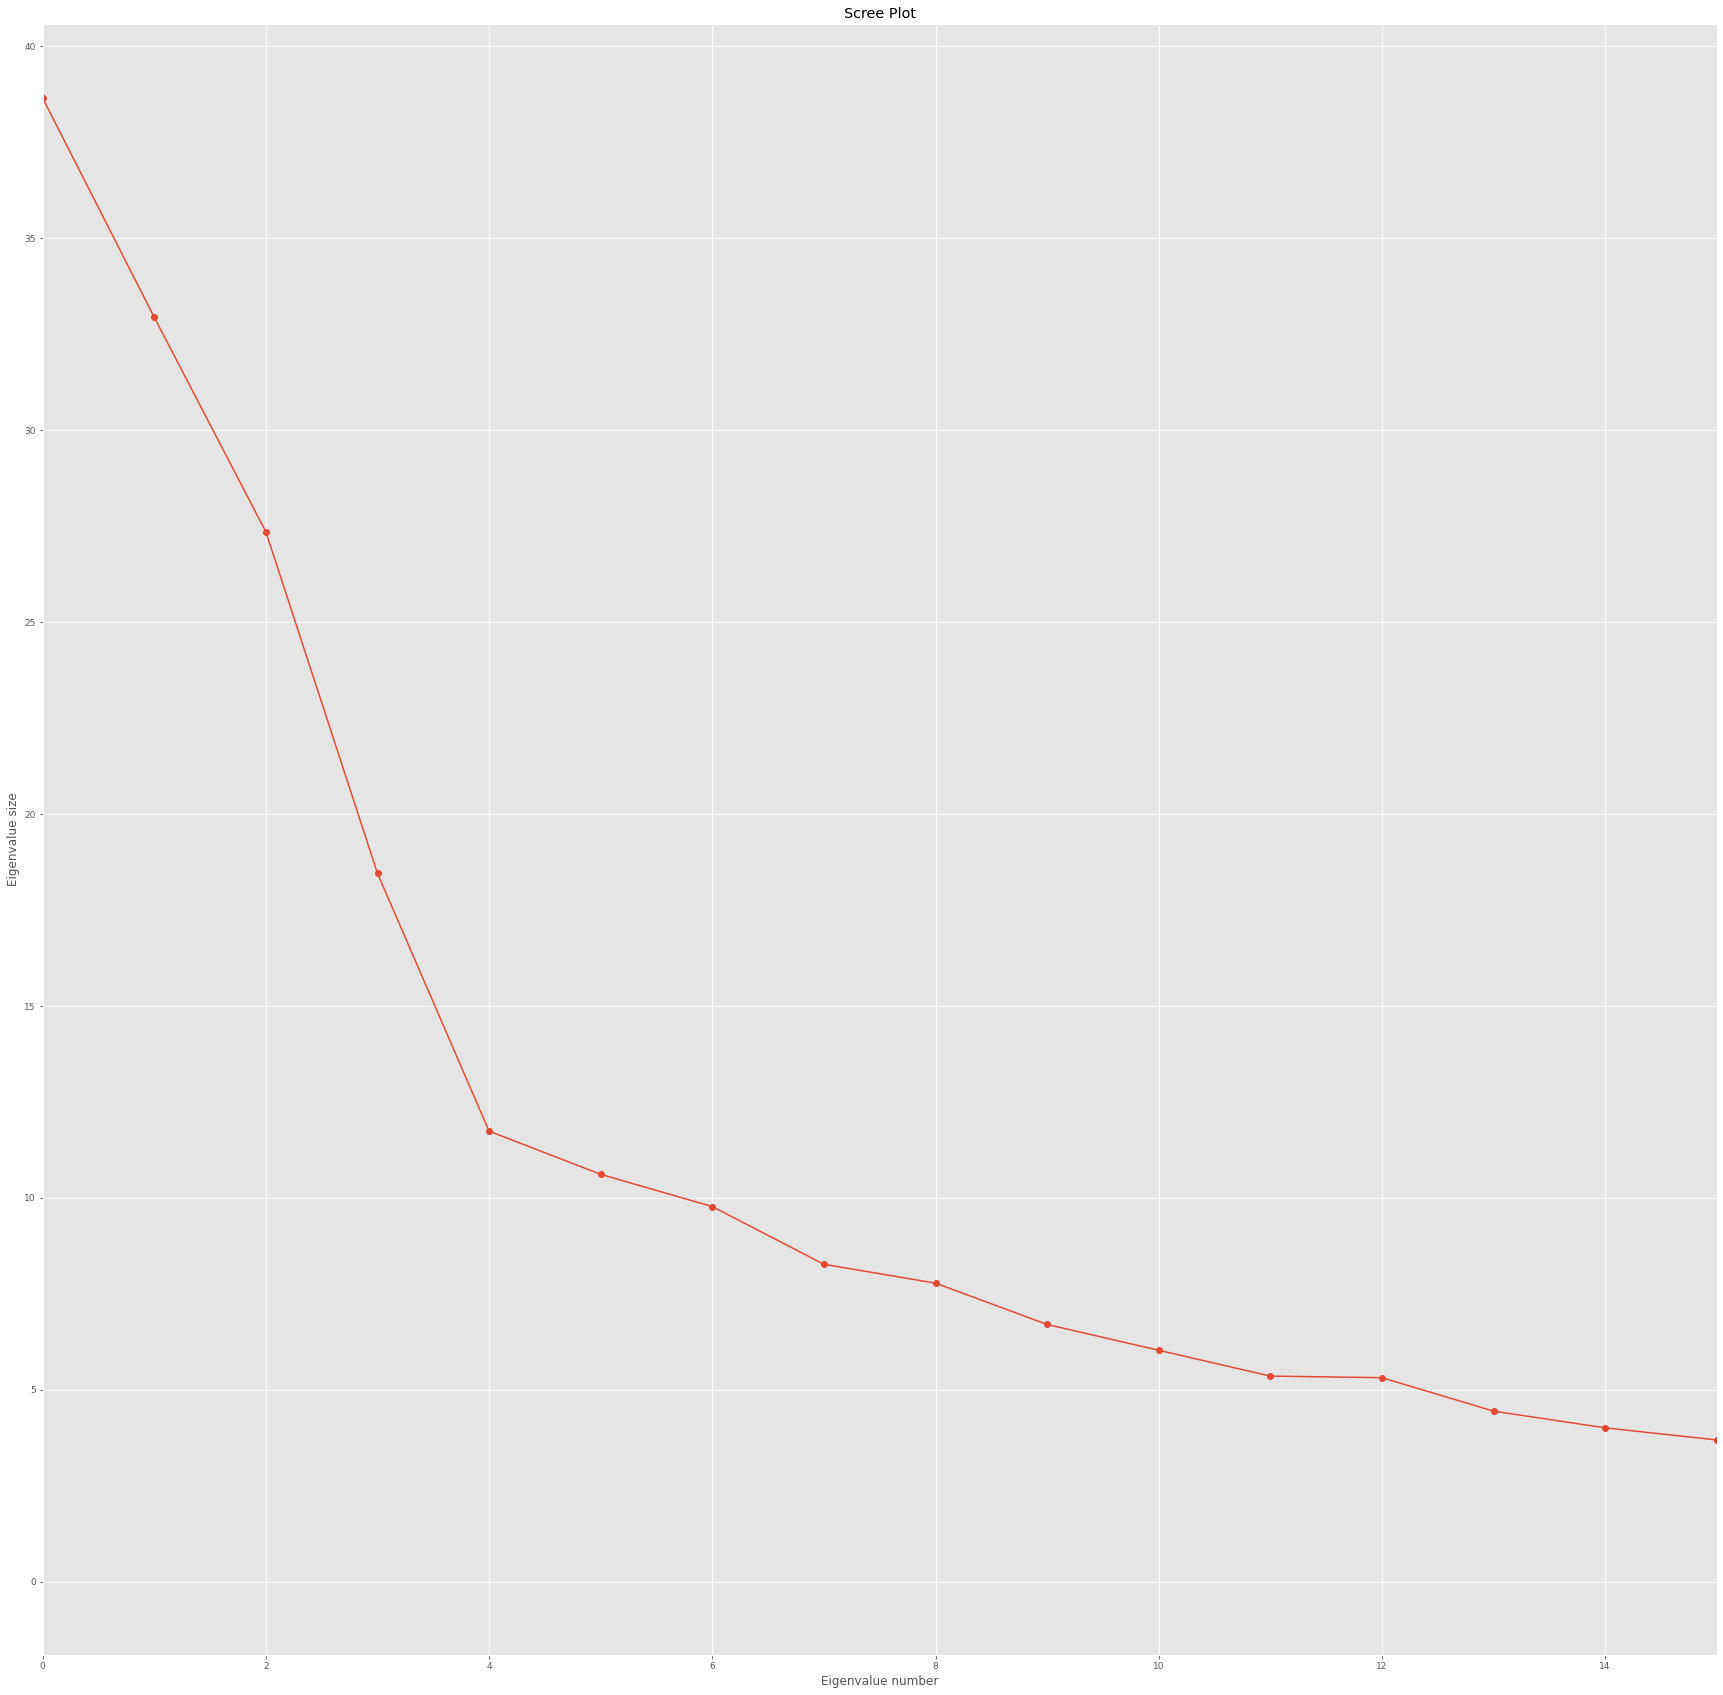

In [171]:
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")
plt.xlim(0,15)

# Classic Model (25 Points)


In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)


## make 5Fold

In [147]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


## Classic Model

a function to scale the data and then train the model and print the results

In [148]:
def classic_model(model, kfold, X_train, X_test, y_train, y_test,name):
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print(name)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    
    print("\n")
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, test_pred))
    print('Classification Report:  ')
    print(classification_report(y_test, test_pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    return test_pred, test_score, results.mean()

## RandomForest

In [149]:
random_forest = RandomForestClassifier(random_state=42)
rf_clinical_test_pred, rf_clinical_test_score, rf_clinical_cv_score = classic_model(random_forest, kfold, clinical_X_train, clinical_X_test, clinical_y_train, clinical_y_test,"Random Forest Clinical")
rf_gen_test_pred, rf_gen_test_score, rf_gen_cv_score = classic_model(random_forest, kfold, gen_X_train, gen_X_test, gen_y_train, gen_y_test,"Random Forest genes")
rf_gen_reduced_test_pred, rf_gen_reduced_test_score, rf_gen_reduced_cv_score = classic_model(random_forest, kfold, gen_X_train_reduced_3d, gen_X_test_reduced_3d, gen_y_train, gen_y_test,"Random Forest  reduced genes")


Random Forest Clinical
CV scores:  [0.71428571 0.70952381 0.72248804 0.76076555 0.75119617]
CV Standard Deviation:  0.020517292043702895

CV Mean score:  0.7316518569150148
Train score:    1.0
Test score:     0.7862595419847328



Confusion Matrix: 
[[125  24]
 [ 32  81]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       149
           1       0.77      0.72      0.74       113

    accuracy                           0.79       262
   macro avg       0.78      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262

Random Forest genes
CV scores:  [0.63934426 0.66229508 0.64590164 0.63157895 0.62171053]
CV Standard Deviation:  0.013693874995917262

CV Mean score:  0.6401660914581535
Train score:    1.0
Test score:     0.6456692913385826



Confusion Matrix: 
[[190  31]
 [104  56]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.65  

## Random Forest Grid Search

In [150]:
def RandomForest_GridSearch(kfold,X_train, X_test, y_train, y_test,name):

    print(); print('Grid Search with Random Forest Classifier Model:')
    #kfold=5
    rf_params = {
        #'n_estimators': [10, 50, 100, 150, 200, 250],
        'max_features':[2, 3, 5, 7, 8],
        #'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini', 'entropy'],
    }

    random_forest = RandomForestClassifier(n_estimators=100)
    gs = GridSearchCV(random_forest, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred, gs_test_score, gs_cv_score = classic_model(gs, kfold, X_train, X_test, y_train, y_test,name)
    
    return gs.best_estimator_, gs_pred, gs_test_score, gs_cv_score

### Run models

In [151]:
gs_rf_best_model_clinical,gs_rf_clinical_test_pred, gs_rf_clinical_test_score, gs_rf_clinical_cv_score = RandomForest_GridSearch(kfold, clinical_X_train, clinical_X_test, clinical_y_train, clinical_y_test,"GS Random Forest Clinical")
gs_rf_best_model_gen,gs_rf_gen_test_pred, gs_rf_gen_test_score, gs_rf_gen_cv_score = RandomForest_GridSearch( kfold, gen_X_train, gen_X_test, gen_y_train, gen_y_test,"GS Random Forest genes")
gs_rf_best_model_gen_reduced,gs_rf_gen_reduced_test_pred, gs_rf_gen_reduced_test_score, gs_rf_gen_reduced_cv_score = RandomForest_GridSearch( kfold, gen_X_train_reduced_3d, gen_X_test_reduced_3d, gen_y_train, gen_y_test,"GS Random Forest  reduced genes")



Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
GS Random Forest Clinical
CV scores:  [0.7        0.71904762 0.6937799  0.6937799  0.74641148]
CV Standard Deviation:  0.0201594432818322

CV Mean score:  0.7106037821827295
Train score:    1.0
Test score:     0.7977099236641222



Confusion Matrix: 
[[125  24]
 [ 29  84]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       149
           1       0.78      0.74      0.76       113

    accuracy                           0.80       262
   macro avg       0.79      0.79      0.79       262
weighted avg       

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [ 1.  1. nan nan nan]



Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [ 1.  1. nan nan nan]



Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [ 1.  1. nan nan nan]



Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [ 1.  1. nan nan nan]



Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [ 1.  1. nan nan nan]



Fitting 5 folds for each of 5 candidates, totalling 25 fits
GS Random Forest  reduced genes
CV scores:  [1. 1. 1. 1. 1.]
CV Standard Deviation:  0.0

CV Mean score:  1.0
Train score:    1.0
Test score:     0.5958005249343832



Confusion Matrix: 
[[140  81]
 [ 73  87]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       221
           1       0.52      0.54      0.53       160

    accuracy                           0.60       381
   macro avg       0.59      0.59      0.59       381
weighted avg       0.60      0.60      0.60       381



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [ 1.  1. nan nan nan]



## Simple regression

In [152]:
def errors(X,y_pred,y_real,title):
    print("Errors ",title,":")
    # print("accuracy: "+ str(regr.score(gen_y_train,gen_y_test)*100) + "%")
    print("Mean absolute error: {}".format(mean_absolute_error(y_real,y_pred)))
    print("Mean squared error: {}".format(mean_squared_error(y_real,y_pred)))
    R2 = r2_score(y_real,y_pred)
    print('R Squared: {}'.format(R2))
    n=gen_X.shape[0]
    p=gen_X.shape[1] - 1
    adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
    print('Adjusted R Squared: {}'.format(adj_rsquared))

params = {
    "penalty": [ "l2"],
    "C": np.logspace(-2,4,100)
    }
regr = GridSearchCV(LogisticRegression(random_state=42), params, n_jobs=-1, cv=4)

#regr = linear_model.LinearRegression()
# regr.fit(gen_X_train,gen_y_train)
# y_pred = regr.predict(gen_X_test)
reg_clinical_test_pred, reg_clinical_test_score, reg_clinical_cv_score = classic_model(regr, kfold, clinical_X_train, clinical_X_test, clinical_y_train, clinical_y_test,"Regression Clinical")
reg_gen_test_pred, reg_gen_test_score, reg_gen_cv_score = classic_model(regr, kfold, gen_X_train, gen_X_test, gen_y_train, gen_y_test,"Regression genes")
reg_gen_reduced_test_pred, reg_gen_reduced_test_score, reg_gen_reduced_cv_score = classic_model(regr, kfold, gen_X_train_reduced_3d, gen_X_test_reduced_3d, gen_y_train, gen_y_test,"Regression reduced genes")

errors(clinical_X_test,reg_clinical_test_pred,clinical_y_test,"clincial data")
errors(gen_X_test,reg_gen_test_pred,gen_y_test,"genes data")
errors(gen_X_test_reduced_3d,reg_gen_reduced_test_pred,gen_y_test,"reduced genes data")

Regression Clinical
CV scores:  [0.70952381 0.71904762 0.70334928 0.74162679 0.73684211]
CV Standard Deviation:  0.014951186810338659

CV Mean score:  0.722077922077922
Train score:    0.7679083094555874
Test score:     0.7900763358778626



Confusion Matrix: 
[[127  22]
 [ 33  80]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       149
           1       0.78      0.71      0.74       113

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262

Regression genes
CV scores:  [0.69180328 0.66557377 0.6295082  0.63157895 0.61513158]
CV Standard Deviation:  0.027968885093921016

CV Mean score:  0.6467191544434858
Train score:    0.7977675640183848
Test score:     0.6220472440944882



Confusion Matrix: 
[[157  64]
 [ 80  80]]
Classification Report:  
              precision    recall  f1-score   support

  

## XG boost

In [153]:
#Use classifier or regressor according to your problem
xgb = XGBClassifier()
#model.fit(gen_X_train,gen_y_train)

xgb_clinical_test_pred, xgb_clinical_test_score, xgb_clinical_cv_score = classic_model(xgb, kfold, clinical_X_train, clinical_X_test, clinical_y_train, clinical_y_test,"XG Boost Clinical")
xgb_gen_test_pred, xgb_gen_test_score, xgb_gen_cv_score = classic_model(xgb, kfold, gen_X_train, gen_X_test, gen_y_train, gen_y_test,"XG Boost genes")
xgb_gen_reduced_test_pred, xgb_gen_reduced_test_score, xgb_gen_reduced_cv_score = classic_model(xgb, kfold, gen_X_train_reduced_3d, gen_X_test_reduced_3d, gen_y_train, gen_y_test,"XG Boost reduced genes")


XG Boost Clinical
CV scores:  [0.76190476 0.80952381 0.75598086 0.74641148 0.75119617]
CV Standard Deviation:  0.022844577187129074

CV Mean score:  0.7650034176349966
Train score:    0.8729703915950334
Test score:     0.8282442748091603



Confusion Matrix: 
[[124  25]
 [ 20  93]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       149
           1       0.79      0.82      0.81       113

    accuracy                           0.83       262
   macro avg       0.82      0.83      0.83       262
weighted avg       0.83      0.83      0.83       262

XG Boost genes
CV scores:  [0.63278689 0.6295082  0.64590164 0.63486842 0.64473684]
CV Standard Deviation:  0.006571891150808957

CV Mean score:  0.6375603968938741
Train score:    0.9546946815495733
Test score:     0.6430446194225722



Confusion Matrix: 
[[169  52]
 [ 84  76]]
Classification Report:  
              precision    recall  f1-score   support

     

# Neural Network (30 Points)


In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)


# MLP

In [154]:
def kfold_MLP(mlp,kfold,X,y,name):
    test_scores=[]
    train_scores=[]
    for (train, test) in kfold.split(X,y):
        data_train = X.iloc[train]
        labels_train = y.iloc[train]
        data_test = X.iloc[test]
        labels_test = y.iloc[test]
        mlp.fit(data_train,labels_train)
        train_scores.append(mlp.score(data_train, labels_train))
        test_scores.append(mlp.score(data_test, labels_test))
        # print("Training set score", mlp.score(data_train, labels_train))
        # print("Testing set score", mlp.score(data_test, labels_test))
    return np.mean(train_scores),np.mean(test_scores)
    

## MLP for clinical data

In [155]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)



### Using k fold

In [156]:
mlp_clinical_train_score_cv,mlp_clinical_test_score_cv=kfold_MLP(clf,kfold,clinical_X,clinical_y,"clinical data")


Iteration 1, loss = 0.95049104
Iteration 2, loss = 0.72867226
Iteration 3, loss = 0.56691687
Iteration 4, loss = 0.55026670
Iteration 5, loss = 0.53077276
Iteration 6, loss = 0.52984289
Iteration 7, loss = 0.51703361
Iteration 8, loss = 0.51454632
Iteration 9, loss = 0.51609009
Iteration 10, loss = 0.57821556
Iteration 11, loss = 0.55937934
Iteration 12, loss = 0.54629877
Iteration 13, loss = 0.53429404
Iteration 14, loss = 0.49535555
Iteration 15, loss = 0.50233751
Iteration 16, loss = 0.48904922
Iteration 17, loss = 0.49798783
Iteration 18, loss = 0.49826631
Iteration 19, loss = 0.48331142
Iteration 20, loss = 0.48486477
Iteration 21, loss = 0.48673801
Iteration 22, loss = 0.48510505
Iteration 23, loss = 0.48734155
Iteration 24, loss = 0.49068312
Iteration 25, loss = 0.48003547
Iteration 26, loss = 0.47891584
Iteration 27, loss = 0.48273672
Iteration 28, loss = 0.49211670
Iteration 29, loss = 0.48466715
Iteration 30, loss = 0.48798250
Iteration 31, loss = 0.47024979
Iteration 32, los

In [157]:
# Fit data onto the model
clf.fit(clinical_X_train,clinical_y_train)
mlp_clinical_test_pred=clf.predict(clinical_X_test)
mlp_clinical_train_score=clf.score(clinical_X_train, clinical_y_train)
mlp_clinical_test_score=clf.score(clinical_X_test, clinical_y_test)

Iteration 1, loss = 0.96367180
Iteration 2, loss = 0.63784942
Iteration 3, loss = 0.56261537
Iteration 4, loss = 0.55719829
Iteration 5, loss = 0.60278902
Iteration 6, loss = 0.58249257
Iteration 7, loss = 0.54531385
Iteration 8, loss = 0.53400550
Iteration 9, loss = 0.54015103
Iteration 10, loss = 0.55336188
Iteration 11, loss = 0.54218857
Iteration 12, loss = 0.57782771
Iteration 13, loss = 0.52488752
Iteration 14, loss = 0.51159402
Iteration 15, loss = 0.51039495
Iteration 16, loss = 0.51389010
Iteration 17, loss = 0.51160732
Iteration 18, loss = 0.50837674
Iteration 19, loss = 0.50641502
Iteration 20, loss = 0.50338366
Iteration 21, loss = 0.51449979
Iteration 22, loss = 0.50430327
Iteration 23, loss = 0.52981518
Iteration 24, loss = 0.50905359
Iteration 25, loss = 0.51511209
Iteration 26, loss = 0.53152538
Iteration 27, loss = 0.50759383
Iteration 28, loss = 0.50788655
Iteration 29, loss = 0.49852429
Iteration 30, loss = 0.49510899
Iteration 31, loss = 0.49672743
Iteration 32, los

### Results

In [158]:
print("Clinical data:")
print("train mean CV score:",mlp_clinical_train_score_cv)
print("test mean CV score:",mlp_clinical_test_score_cv)
print("train score:",mlp_clinical_train_score)
print("test score:",mlp_clinical_test_score)

Clinical data:
train mean CV score: 0.7816972520542154
test mean CV score: 0.7471732327220615
train score: 0.7793696275071633
test score: 0.816793893129771


## MLP for genes data

In [159]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)



### Using k fold

In [160]:
mlp_gen_train_score_cv,mlp_gen_test_score_cv=kfold_MLP(clf,kfold,gen_X,gen_y,"genes data")


Iteration 1, loss = 0.66261525
Iteration 2, loss = 0.60872279
Iteration 3, loss = 0.55242600
Iteration 4, loss = 0.50611104
Iteration 5, loss = 0.45264520
Iteration 6, loss = 0.40673074
Iteration 7, loss = 0.36736904
Iteration 8, loss = 0.32790243
Iteration 9, loss = 0.29651173
Iteration 10, loss = 0.26657848
Iteration 11, loss = 0.24119322
Iteration 12, loss = 0.22333250
Iteration 13, loss = 0.20885020
Iteration 14, loss = 0.20407251
Iteration 15, loss = 0.18994600
Iteration 16, loss = 0.17662144
Iteration 17, loss = 0.15010862
Iteration 18, loss = 0.13704558
Iteration 19, loss = 0.12432920
Iteration 20, loss = 0.11922680
Iteration 21, loss = 0.10647448
Iteration 22, loss = 0.09743712
Iteration 23, loss = 0.08988786
Iteration 24, loss = 0.08365382
Iteration 25, loss = 0.07400757
Iteration 26, loss = 0.06836018
Iteration 27, loss = 0.06354336
Iteration 28, loss = 0.06036785
Iteration 29, loss = 0.05540452
Iteration 30, loss = 0.05406984
Iteration 31, loss = 0.05098988
Iteration 32, los

In [161]:
# Fit data onto the model
clf.fit(gen_X_train,gen_y_train)
mlp_gen_test_pred=clf.predict(gen_X_test)
mlp_gen_train_score=clf.score(gen_X_train, gen_y_train)
mlp_gen_test_score=clf.score(gen_X_test, gen_y_test)

Iteration 1, loss = 0.66647558
Iteration 2, loss = 0.59227211
Iteration 3, loss = 0.53774132
Iteration 4, loss = 0.48736777
Iteration 5, loss = 0.44137940
Iteration 6, loss = 0.38686872
Iteration 7, loss = 0.34627246
Iteration 8, loss = 0.31137517
Iteration 9, loss = 0.28511714
Iteration 10, loss = 0.25172494
Iteration 11, loss = 0.22939491
Iteration 12, loss = 0.20934800
Iteration 13, loss = 0.19582745
Iteration 14, loss = 0.18817178
Iteration 15, loss = 0.17511472
Iteration 16, loss = 0.15648654
Iteration 17, loss = 0.14089124
Iteration 18, loss = 0.13232156
Iteration 19, loss = 0.12725553
Iteration 20, loss = 0.12330016
Iteration 21, loss = 0.11220124
Iteration 22, loss = 0.11174828
Iteration 23, loss = 0.10346365
Iteration 24, loss = 0.09654242
Iteration 25, loss = 0.09238161
Iteration 26, loss = 0.08413083
Iteration 27, loss = 0.07914353
Iteration 28, loss = 0.07593137
Iteration 29, loss = 0.07289132
Iteration 30, loss = 0.07003261
Iteration 31, loss = 0.06752395
Iteration 32, los

### Results

In [162]:
print("genes data:")
print("train mean CV score:",mlp_gen_train_score_cv)
print("test mean CV score:",mlp_gen_test_score_cv)
print("train score:",mlp_gen_train_score)
print("test score:",mlp_gen_test_score)

genes data:
train mean CV score: 0.980433872226904
test mean CV score: 0.611356540958696
train score: 0.9474720945502298
test score: 0.5958005249343832


## MLP for reduced genes data

In [163]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)



### Using k fold

In [164]:
#mlp_gen_reduced_train_score_cv,mlp_gen_reduced_test_score_cv=kfold_MLP(clf,kfold,gen_reduced_X_3d,gen_y,"Reduced genes data")


In [165]:
# Fit data onto the model
clf.fit(gen_X_train_reduced_3d,gen_y_train)
mlp_gen_reduced_test_pred=clf.predict(gen_X_test_reduced_3d)
mlp_gen_reduced_train_score=clf.score(gen_X_train_reduced_3d, gen_y_train)
mlp_gen_reduced_test_score=clf.score(gen_X_test_reduced_3d, gen_y_test)

Iteration 1, loss = 0.62566292
Iteration 2, loss = 0.57995392
Iteration 3, loss = 0.54973173
Iteration 4, loss = 0.52116935
Iteration 5, loss = 0.49469694
Iteration 6, loss = 0.46956257
Iteration 7, loss = 0.44549659
Iteration 8, loss = 0.42259664
Iteration 9, loss = 0.40111588
Iteration 10, loss = 0.38066736
Iteration 11, loss = 0.36147048
Iteration 12, loss = 0.34332095
Iteration 13, loss = 0.32621172
Iteration 14, loss = 0.31022814
Iteration 15, loss = 0.29509793
Iteration 16, loss = 0.28081060
Iteration 17, loss = 0.26758369
Iteration 18, loss = 0.25483000
Iteration 19, loss = 0.24296374
Iteration 20, loss = 0.23190207
Iteration 21, loss = 0.22141851
Iteration 22, loss = 0.21142130
Iteration 23, loss = 0.20210894
Iteration 24, loss = 0.19347872
Iteration 25, loss = 0.18511939
Iteration 26, loss = 0.17732983
Iteration 27, loss = 0.17004113
Iteration 28, loss = 0.16308356
Iteration 29, loss = 0.15657084
Iteration 30, loss = 0.15037332
Iteration 31, loss = 0.14459357
Iteration 32, los

### Results

In [166]:
print("Reduced genes data:")
# print("train mean CV score:",mlp_gen_train_score_cv)
# print("test mean CV score:",mlp_gen_test_score_cv)
print("train score:",mlp_gen_reduced_train_score)
print("test score:",mlp_gen_reduced_test_score)

Reduced genes data:
train score: 1.0
test score: 0.5958005249343832


# Model Comparison (10 Points)


Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.


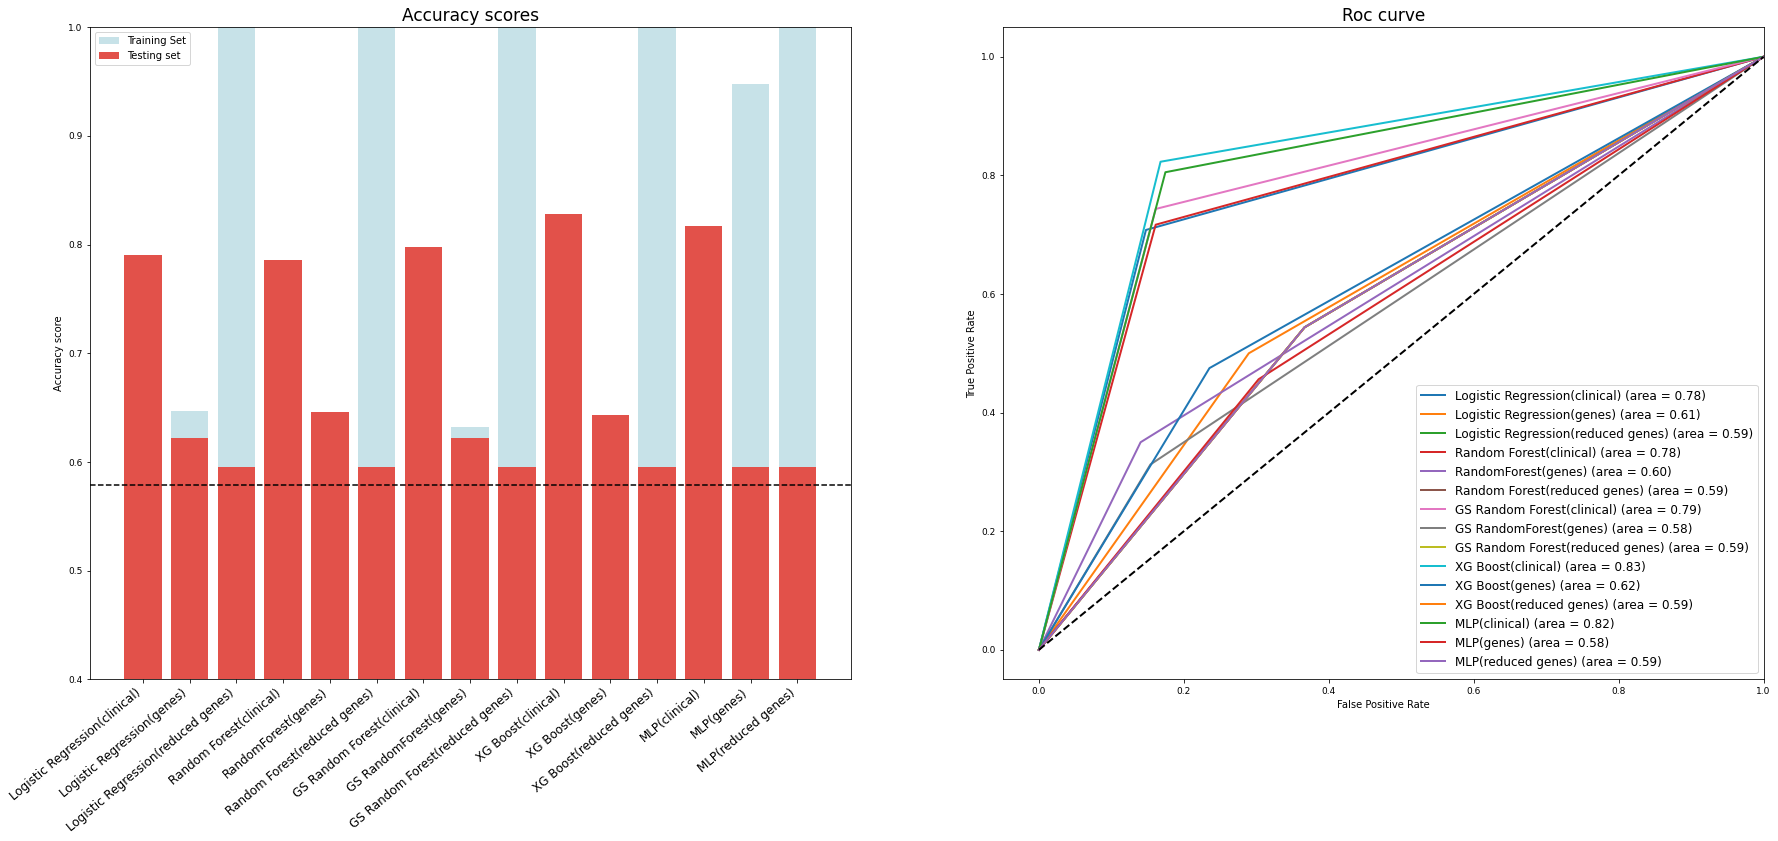

In [169]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(30,12))

#bar chart of accuracy scores
inds = range(1,16)
labels = ["Logistic Regression(clinical)","Logistic Regression(genes)","Logistic Regression(reduced genes)","Random Forest(clinical)","RandomForest(genes)","Random Forest(reduced genes)","GS Random Forest(clinical)","GS RandomForest(genes)","GS Random Forest(reduced genes)", "XG Boost(clinical)","XG Boost(genes)","XG Boost(reduced genes)","MLP(clinical)","MLP(genes)","MLP(reduced genes)"]
scores_all = [reg_clinical_cv_score,reg_gen_cv_score,reg_gen_reduced_cv_score,rf_clinical_cv_score,rf_gen_cv_score,rf_gen_reduced_cv_score,gs_rf_clinical_cv_score,gs_rf_gen_cv_score,gs_rf_gen_reduced_cv_score,xgb_clinical_cv_score,xgb_gen_cv_score,xgb_gen_reduced_cv_score,mlp_clinical_train_score,mlp_gen_train_score,mlp_gen_reduced_train_score]
scores_predictive = [reg_clinical_test_score,reg_gen_test_score,reg_gen_reduced_test_score,rf_clinical_test_score,rf_gen_test_score,rf_gen_reduced_test_score,gs_rf_clinical_test_score,gs_rf_gen_test_score,gs_rf_gen_reduced_test_score,xgb_clinical_test_score,xgb_gen_test_score,xgb_gen_reduced_test_score,mlp_clinical_test_score,mlp_gen_test_score,mlp_gen_reduced_test_score]

ax1.bar(inds, scores_all, color=sns.color_palette("Spectral")[5], alpha=0.3, hatch="x", edgecolor="none",label="Training Set")
ax1.bar(inds, scores_predictive, color=sns.color_palette("Spectral")[0], label="Testing set")
ax1.set_ylim(0.4, 1)
ax1.set_ylabel("Accuracy score")
ax1.axhline(base_line_accuracy[0], color="black", linestyle="--")
ax1.set_title("Accuracy scores", fontsize=17)
ax1.set_xticks(range(1,16))
ax1.set_xticklabels(labels, size=12, rotation=40, ha="right")
ax1.legend()

labels = ["Logistic Regression(clinical)","Logistic Regression(genes)","Logistic Regression(reduced genes)","Random Forest(clinical)","RandomForest(genes)","Random Forest(reduced genes)","GS Random Forest(clinical)","GS RandomForest(genes)","GS Random Forest(reduced genes)", "XG Boost(clinical)","XG Boost(genes)","XG Boost(reduced genes)","MLP(clinical)","MLP(genes)","MLP(reduced genes)"]

for label, pred,y_test in zip(labels, 
                              [reg_clinical_test_pred,reg_gen_test_pred,reg_gen_reduced_test_pred,rf_clinical_test_pred,rf_gen_test_pred,rf_gen_reduced_test_pred,gs_rf_clinical_test_pred,gs_rf_gen_test_pred,gs_rf_gen_reduced_test_pred,xgb_clinical_test_pred,xgb_gen_test_pred,xgb_gen_reduced_test_pred,mlp_clinical_test_pred,mlp_gen_test_pred,mlp_gen_reduced_test_pred],
                              [clinical_y_test,gen_y_test,gen_y_test,clinical_y_test,gen_y_test,gen_y_test,clinical_y_test,gen_y_test,gen_y_test,clinical_y_test,gen_y_test,gen_y_test,clinical_y_test,gen_y_test,gen_y_test]
                              ):
    fpr, tpr, threshold = roc_curve(y_test.values, pred)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
ax2.set_xlim([-0.05, 1.0])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc="lower right", prop={'size': 12})
ax2.set_title("Roc curve", fontsize=17)

plt.show()